# Configuração inicial

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'width': 1024, 'height': 768, 'scroll': True}

# Raízes (ou zeros)

## Motivação: Exemplo do saltador de Bungee jumping

CHAPRA, S. C. "Métodos numéricos aplicados com MATLAB para engenheiros e cientistas" 

### Definição do problema

Encontre a massa que faz com que um saltador de bungee jumping ultrapasse a velocidade de 36m/s após 4s de queda livre.

A velocidade é dada pela equação:

\begin{equation} \label{eq:jump1}
v(t) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right)
\end{equation}

Suponha que:

* $c_d = 0.25 kg/m$
* $g = 9.8m/s^2$

### Primeira tentativa

Isolar $m$ da equação \ref{eq:jump1}

$
m = f(v,g,c_d,t)
$

Porém, é muito difícil manipular a eq. \ref{eq:jump1} e isolar $m$!


## Solução

### Criando uma nova função

\begin{equation} \label{eq:jump2}
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

Transformamos o problema original em encontrar as raízes (zeros) de $f(m)$!

# Método da força bruta

* O mais simples deles
* Baixa precisão
* Consiste em determinar diversos valores de $f(m)$ e inspecionar manualmente

\begin{equation} 
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

In [4]:
import math as m
import numpy as np

In [20]:
g = 9.8
cd = 0.25
v = 36
t = 4
for massa in np.arange(144.4,144.5,0.01):
    fm = m.sqrt( g*massa/cd ) * m.tanh( m.sqrt( g*cd/massa ) * t ) - v
    print(massa, ' ', fm)

144.4   -0.00013384739578725657
144.41   6.610093494430203e-05
144.42   0.0002660242774368271
144.42999999999998   0.0004659226363941116
144.43999999999997   0.0006657960164986321
144.44999999999996   0.0008656444224186544
144.45999999999995   0.001065467858850866
144.46999999999994   0.001265266330470638
144.47999999999993   0.0014650398419533417
144.48999999999992   0.0016647883979743483


<div class="alert alert-block alert-info">Analisando os dados, vemos que a raíz encontra-se entre 144kg e 145kg.</div>

# Método gráfico

* Um pouco mais refinado
* Permite analisar melhor a função
* Ainda é manual
* Baixa precisão

In [43]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget

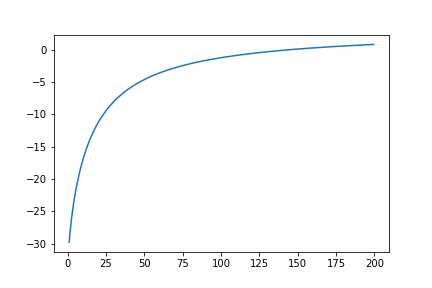

In [44]:
g = 9.8
cd = 0.25
v = 36
t = 4
massa = np.arange(1,200, 0.5)
fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v

plt.plot(massa, fm)
mplcursors.cursor(hover=True)

# Utilizando bibliotecas nativas

* Alta precisão
* Simples
* É preciso entender **quando elas falham!**

In [12]:
import numpy as np
from scipy.optimize import fsolve

In [11]:
def jump(massa):
    g = 9.8
    cd = 0.25
    v = 36
    t = 4
    fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v
    return fm

In [18]:
root = fsolve(jump, 140)
print(root)

[144.40669396]


# Métodos intervalares

## Método da bissecção

## Método da falsa posição

# Métodos abertos

## Iteração do ponto fixo

## Método de Newton-Raphson

## Método da Secante